## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

\newpage

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [97]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [98]:
data= "https://archive.ics.uci.edu/static/public/336/data.csv"
kidney=pd.read_csv(data)
kidney.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [99]:
kidney.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


1. Classification problem: Develop a statistic model to classify patients as having chronic kidney disease or not, based on their medical diagnostic measurements including their age, bp, sg, al, su, bgr, bu, sc, sod, pot, hemo, pcv, wbcc, rbcc and other variables.


2. From the dataset, we find some of the variables are object value, so we turn it into a logistic model with positive (1) and negative (0) in order to help further interpretations. Besides, we do a scale on each float variable.

In [100]:
kidney.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [101]:
float = kidney.select_dtypes(include=['float64']).columns
object = kidney.select_dtypes(include=['object']).columns

In [102]:
maps = {
    'rbc': {'normal': 1, 'abnormal': 0},
    'pc': {'normal': 1, 'abnormal': 0},
    'pcc': {'present': 1, 'notpresent': 0},
    'ba': {'present': 1, 'notpresent': 0},
    'htn': {'yes': 1, 'no': 0},
    'dm': {'yes': 1, 'no': 0},
    'cad': {'yes': 1, 'no': 0},
    'pe': {'yes': 1, 'no': 0},
    'ane': {'yes': 1, 'no': 0},
    'appet': {'good': 1, 'poor': 0},
}


In [103]:
for column, map in maps.items():
    kidney[column]=kidney[column].replace(map)

In [104]:
kidney.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1,0.0,1.0,0.0,0.0,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0,0.0,1.0,0.0,0.0,ckd
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1,0.0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0,0.0,0.0,1.0,1.0,ckd
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0,0.0,1.0,0.0,0.0,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,74.0,...,39.0,7800.0,4.4,1.0,1,0.0,1.0,1.0,0.0,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,1.0,0.0,0.0,100.0,...,36.0,NaN,NaN,0.0,0,0.0,1.0,0.0,0.0,ckd
7,24.0,NaN,1.015,2.0,4.0,1.0,0.0,0.0,0.0,410.0,...,44.0,6900.0,5.0,0.0,1,0.0,1.0,1.0,0.0,ckd
8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,1.0,0.0,138.0,...,33.0,9600.0,4.0,1.0,1,0.0,1.0,0.0,1.0,ckd
9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1,0.0,0.0,0.0,1.0,ckd


In [105]:
scale=StandardScaler()
kidney[float]=scale.fit_transform(kidney[float])

3. There are 25 variables, including 11 object variables and 14 variables. wbcc has the largest variance before scaler, while htn has the largest variance after scaler. Besides, the vairable age has the highest observation units at 391, with sample mean at 51.483376. The 25%, 50%, 75% percentaile of each variable after sacler is given below:

In [106]:
kidney.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,hemo,pcv,wbcc,rbcc,htn,cad,appet,pe,ane
count,3.910000e+02,3.880000e+02,3.530000e+02,3.540000e+02,3.510000e+02,248.000000,335.000000,396.000000,396.000000,3.560000e+02,...,3.120000e+02,3.480000e+02,3.290000e+02,2.940000e+02,2.690000e+02,398.000000,398.000000,399.000000,399.000000,399.000000
mean,3.421531e-17,-8.913260e-17,2.470797e-15,6.328898e-16,-2.024338e-17,0.810484,0.773134,0.106061,0.055556,-1.418965e-16,...,-6.885518e-17,2.124737e-16,-1.640026e-16,5.739929e-17,9.905336e-16,0.369347,0.085427,0.794486,0.190476,0.150376
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415e+00,1.001428e+00,0.392711,0.419431,0.308305,0.229351,1.001407e+00,...,1.001606e+00,1.001440e+00,1.001523e+00,1.001705e+00,1.001864e+00,0.483235,0.279868,0.404584,0.393170,0.357888
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-7.528679e-01,-4.101061e-01,0.000000,0.000000,0.000000,0.000000,-1.591967e+00,...,-6.671023e-01,-3.241109e+00,-3.329218e+00,-2.111312e+00,-2.547777e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-7.528679e-01,-4.101061e-01,1.000000,1.000000,0.000000,0.000000,-6.193803e-01,...,-2.594231e-01,-7.655198e-01,-7.669527e-01,-6.484596e-01,-7.889609e-01,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.050779e-01,2.583733e-01,4.540705e-01,-7.528679e-01,-4.101061e-01,1.000000,1.000000,0.000000,0.000000,-3.414983e-01,...,-7.126345e-02,4.248496e-02,1.242700e-01,-1.381622e-01,9.044717e-02,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.590867e-01,2.583733e-01,4.540705e-01,7.277723e-01,-4.101061e-01,1.000000,1.000000,0.000000,0.000000,1.890038e-01,...,8.553625e-02,8.504897e-01,6.812843e-01,4.741947e-01,6.767192e-01,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733e+00,4.145186e+00,1.000000,1.000000,1.000000,1.000000,4.319341e+00,...,1.328807e+01,1.813219e+00,1.683910e+00,6.121486e+00,3.217231e+00,1.000000,1.000000,1.000000,1.000000,1.000000


4. The most largest negative correlation is between sod and sc at -0.62, while pcv and hemo shows the largest positive correlation at 0.85. sod and wbcc has approximate 0 correlation, indicating that they may be independent with each other. Besides, al and bu seems to have a strong negative correlation with hemo, pcv and rbcc.

<Axes: >

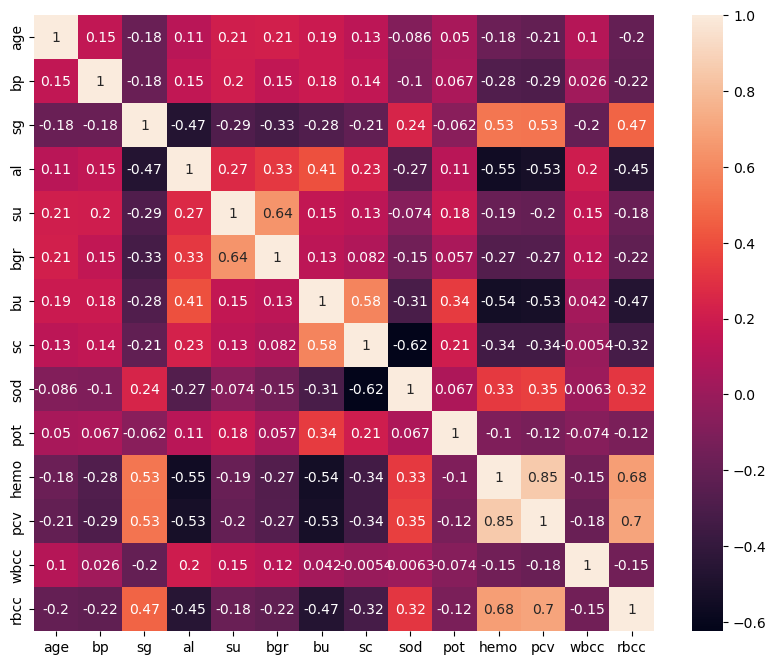

In [107]:
floats_col=kidney[float]
floats_col=floats_col.apply(lambda x: x.fillna(x.mean()),axis=0)
corr=floats_col.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True)

5. Considering there are enough number of observations, we decide to delete all the missing values.

In [108]:
missing=kidney.isnull().sum()
kidney2=kidney.dropna()
kidney_num=kidney2[float]

In [109]:
kidney2.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1.0,0.0,1.0,0.0,-0.392022,...,-0.766953,-0.580420,-0.788961,1.0,0,0.0,0.0,1.0,1.0,ckd
9,0.088445,0.990117,0.454071,0.727772,-0.410106,0.0,0.0,1.0,0.0,-0.985679,...,-1.101161,1.256651,-0.984385,1.0,1,0.0,0.0,0.0,1.0,ckd
11,0.671612,-0.473370,-1.297699,1.468092,-0.410106,0.0,0.0,1.0,0.0,2.929931,...,-0.766953,-1.328856,-0.886673,1.0,1,0.0,0.0,1.0,0.0,ckd
14,0.963195,0.258373,-1.297699,1.468092,1.412011,1.0,0.0,1.0,1.0,0.113218,...,-2.549398,0.882433,-2.059217,1.0,1,1.0,0.0,1.0,0.0,ckd
20,0.554978,0.258373,-0.421814,0.727772,-0.410106,0.0,0.0,0.0,0.0,0.315314,...,-1.658175,0.270076,-1.472945,1.0,1,1.0,0.0,1.0,1.0,ckd
22,-0.203139,0.258373,1.329955,2.208413,-0.410106,1.0,0.0,0.0,0.0,-0.669904,...,-0.766953,-0.512380,-1.277521,1.0,0,0.0,1.0,0.0,1.0,ckd
27,1.021512,-0.473370,-1.297699,1.468092,3.234128,1.0,0.0,0.0,0.0,1.464735,...,-0.209938,0.406155,-0.593537,1.0,1,1.0,1.0,1.0,0.0,ckd
48,1.254779,-0.473370,-2.173584,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.985679,...,-1.101161,3.569999,-1.179809,1.0,1,0.0,1.0,1.0,0.0,ckd
58,1.254779,0.258373,0.454071,0.727772,-0.410106,0.0,0.0,0.0,0.0,1.325794,...,-0.655550,-0.410321,-0.398113,1.0,1,1.0,1.0,0.0,0.0,ckd
71,-0.319772,-1.205114,-1.297699,-0.012548,-0.410106,1.0,1.0,0.0,0.0,0.189004,...,-1.212564,2.107146,-1.472945,1.0,1,0.0,1.0,0.0,0.0,ckd


6. We consider the outliers to be the one with over 75% percentail + 1.5IQR or the one lower than 25% percentail - 1.5 IQR, and we delete all the outliers.

In [110]:
def remove_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = (lower_bound, upper_bound)
    for column, (lower_bound, upper_bound) in outliers.items():
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

In [111]:
kidney3 = remove_outliers(kidney2)

In [112]:
kidney3.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
250,-0.669673,0.258373,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.101509,...,1.015493,0.678314,-0.202689,0.0,0,0.0,1.0,0.0,0.0,notckd
251,-1.661057,0.258373,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.985679,...,1.461104,0.474195,0.285871,0.0,0,0.0,1.0,0.0,0.0,notckd
252,-0.378089,0.258373,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.834107,...,0.792687,0.236056,-0.007265,0.0,0,0.0,1.0,0.0,0.0,notckd
253,0.321711,0.258373,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.366760,...,0.347076,-0.750519,1.458415,0.0,0,0.0,1.0,0.0,0.0,notckd
254,-0.028189,-1.205114,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.619380,...,1.126896,-0.036103,0.481295,0.0,0,0.0,1.0,0.0,0.0,notckd
255,-1.019573,0.258373,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.341498,...,1.461104,0.270076,1.556127,0.0,0,0.0,1.0,0.0,0.0,notckd
256,0.496661,0.258373,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.215188,...,0.235673,0.780373,0.383583,0.0,0,0.0,1.0,0.0,0.0,notckd
257,-0.786306,-1.205114,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.720428,...,0.792687,0.236056,1.067567,0.0,0,0.0,1.0,0.0,0.0,notckd
258,-0.553039,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.632011,...,0.569881,-0.002083,0.774431,0.0,0,0.0,1.0,0.0,0.0,notckd
259,-0.961256,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.556225,...,0.681284,-1.396896,0.481295,0.0,0,0.0,1.0,0.0,0.0,notckd


7. We use PCA method and kmeans here, for kmeans we pick cluster number to be 2

In [113]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.model_selection import train_test_split

In [114]:
x = kidney3.drop("class",axis=1)

In [115]:
pca_x = PCA()
loading=pd.DataFrame(pca_x.fit(x).components_.T,index= x.columns)
loading.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
age,-9.352293e-01,-2.962951e-01,1.391705e-01,2.815905e-02,-5.097237e-02,-3.445860e-02,0.076948,-4.205948e-02,1.355017e-02,-3.950066e-02,...,-1.326280e-18,7.864597e-18,-2.180297e-18,-1.364319e-17,0.0,0.0,0.0,0.0,0.0,0.0
bp,1.007457e-01,-6.783634e-01,-6.581031e-01,-1.801064e-01,4.402530e-02,-1.516465e-01,-0.078083,1.756857e-01,-4.443510e-02,-1.542076e-02,...,1.127458e-16,-6.340638e-17,8.107329e-17,1.560441e-16,0.0,0.0,0.0,0.0,0.0,0.0
sg,1.000174e-01,-6.120727e-02,9.667330e-03,-2.425818e-01,5.396070e-02,-7.834969e-02,0.937613,-1.813935e-01,-1.980710e-02,-7.301563e-02,...,-1.707964e-17,4.575395e-17,-1.834873e-17,-8.908416e-17,0.0,0.0,0.0,0.0,0.0,0.0
al,3.469447e-18,-1.110223e-16,5.551115e-17,-2.775558e-17,-0.000000e+00,1.942890e-16,-0.000000,8.326673e-17,1.387779e-16,-1.665335e-16,...,3.076141e-01,-3.587041e-01,1.893077e-01,7.063745e-01,0.0,0.0,0.0,0.0,0.0,0.0
su,-0.000000e+00,5.551115e-17,1.110223e-16,-5.551115e-17,4.163336e-17,1.110223e-16,-0.000000,5.551115e-17,-2.775558e-17,1.335737e-16,...,-3.662990e-01,1.450520e-02,-1.671079e-01,7.183028e-02,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
score=pd.DataFrame(pca_x.fit_transform(x),index=x.index)
score.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
250,0.260774,0.165559,-1.161144,-0.006122,0.032671,-0.701806,0.286395,-0.823876,0.306734,0.543272,...,6.350088e-18,-2.935705e-18,2.693174e-18,-4.219157e-19,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
251,1.122646,0.442692,-0.996370,-0.379920,1.411377,0.074961,0.224800,0.152713,0.051385,-0.210746,...,-1.860464e-17,2.548972e-17,-1.008380e-17,1.661208e-18,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
252,-0.045922,0.062187,-0.990689,-0.040426,0.549184,0.135593,0.413133,-0.014081,-0.227906,-0.413395,...,2.038163e-17,-8.288061e-18,2.852493e-18,1.696306e-18,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
253,-0.147217,-1.242735,0.315877,-0.572667,-0.689916,0.122680,0.264052,-0.264325,0.170092,0.153689,...,1.833663e-16,5.804169e-17,-2.071246e-17,-2.874548e-18,0.0,0.0,-0.0,-0.0,-0.0,0.0
254,-0.264222,0.631785,0.612187,0.088549,-0.425498,-0.857575,0.398405,-0.433126,-0.031145,-0.224439,...,-1.082588e-16,1.270152e-16,2.596781e-17,1.216913e-18,-0.0,0.0,-0.0,0.0,0.0,0.0


In [117]:
score[0]

250    0.260774
251    1.122646
252   -0.045922
253   -0.147217
254   -0.264222
         ...   
395   -0.538399
396    0.427007
397    2.106776
398    1.771070
399   -0.342430
Name: 0, Length: 115, dtype: float64

In [118]:
means=KMeans(n_clusters=2, n_init=30)
means.fit(x)
means.labels_

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0], dtype=int32)

In [119]:
pd.Series(means.labels_).value_counts()

1    60
0    55
dtype: int64

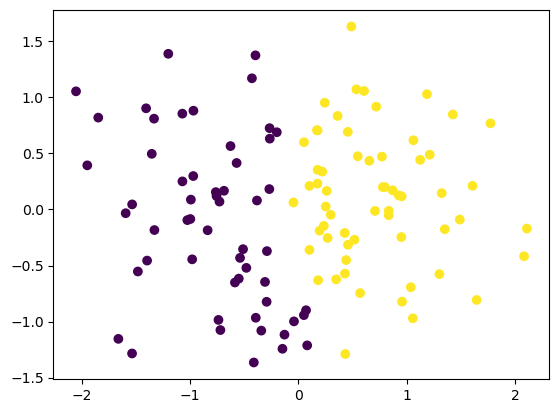

In [120]:
plt.scatter(score[0],score[1],c=means.labels_)

8.

In [121]:
x_train, x_test, y_train, y_test = train_test_split(
    kidney2.drop("class",axis=1),
    kidney2['class'],
    test_size=0.3,
    random_state=1
)

9. We choose to use K-Nearest Neighbors(KNN) and Random Forest. The reason we choose is because KNN is one of the simplest machine learning algorithms and it is effective for small dataset. The reason we select random forest is because Random Forest performs well on a wide range of data types for both numerical and categorical, and it has a good accuracy in classification.

10. Two metrics are Accuracy and F1 score.
Accuracy:
$$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$$
F1 Score:
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

Recall:

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

F1 Score:

$$
\text{F1 Score} = 2 \times \left(\frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}\right)
$$
​


11. For K-Nearest Neighbors(KNN) as we have already done the scaling on the dataset, we can choose the best suitable number of clusters. For random forest, we can improve feature selection by select suitable amount of variables.

12. From the analysis below, we can see the KNN provides a prediction at accuracy 99% and F1 score close to 1, while random forest provides a prediction with accuracy at 100% and f1 score 1. Hence, both models perform exceptionally well, but the Random Forest shows slightly better performance on the testing set with perfect metrics score. And perfect F1 score in random forest indicates that there are no false positive and false negative, while such error might occur in KNN method for this dataset.

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from statistics import mode


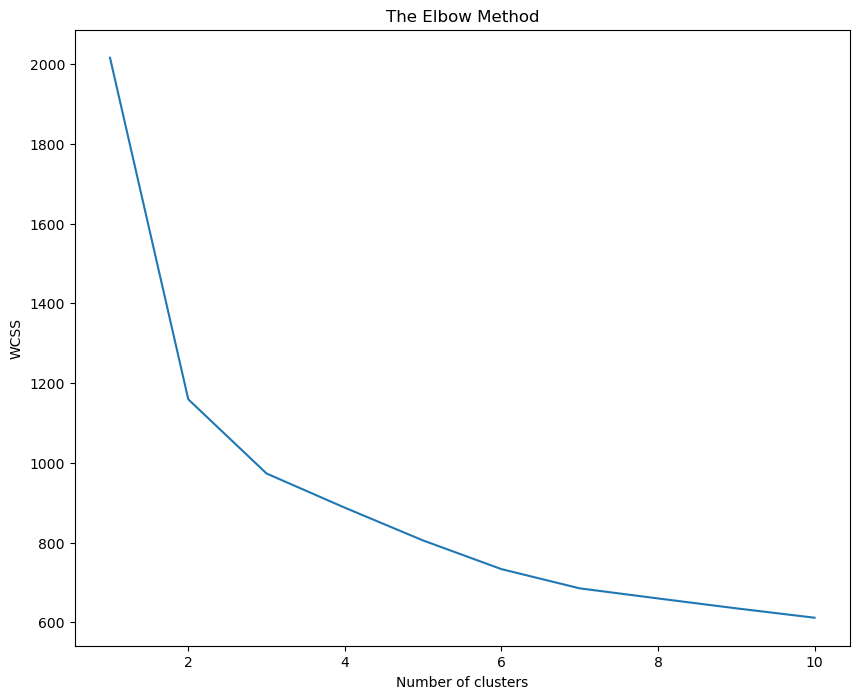

In [123]:
X = kidney2.drop('class', axis=1)

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The Elbow'
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sums of squares
plt.show()

In [124]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x_train)

train_preds = kmeans.predict(x_train)
test_preds = kmeans.predict(x_test)

labels = np.zeros_like(train_preds)
for i in range(2):
    mask = (train_preds == i)
    if np.any(mask): 
        labels[mask] = mode(y_train_encoded[mask])[0][0]  
print("Confusion Matrix on Training Data:")
print(confusion_matrix(y_train_encoded, labels))
print("\nClassification Report on Training Data:")
print(classification_report(y_train_encoded, labels))

test_labels = np.zeros_like(test_preds)
for i in range(2):
    mask = (test_preds == i)
    if np.any(mask):  
        test_labels[mask] = mode(y_test_encoded[mask])[0][0]  

print("Confusion Matrix on Testing Data:")
print(confusion_matrix(y_test_encoded, test_labels))
print("\nClassification Report on Testing Data:")
print(classification_report(y_test_encoded, test_labels))


Confusion Matrix on Training Data:
[[29  1]
 [ 0 80]]

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.99      1.00      0.99        80

    accuracy                           0.99       110
   macro avg       0.99      0.98      0.99       110
weighted avg       0.99      0.99      0.99       110

Confusion Matrix on Testing Data:
[[12  1]
 [ 0 35]]

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.97      1.00      0.99        35

    accuracy                           0.98        48
   macro avg       0.99      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



/Users/songyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/qy/n5vms6vs4jx_s2x0pvdr_qrm0000gn/T/ipykernel_80930/4131344412.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train_encoded[mask])[0][0]
/var/folders/qy/n5vms6vs4jx_s2x0pvdr_qrm0000gn/T/ipykernel_80930/4131344412.py:32: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically pres

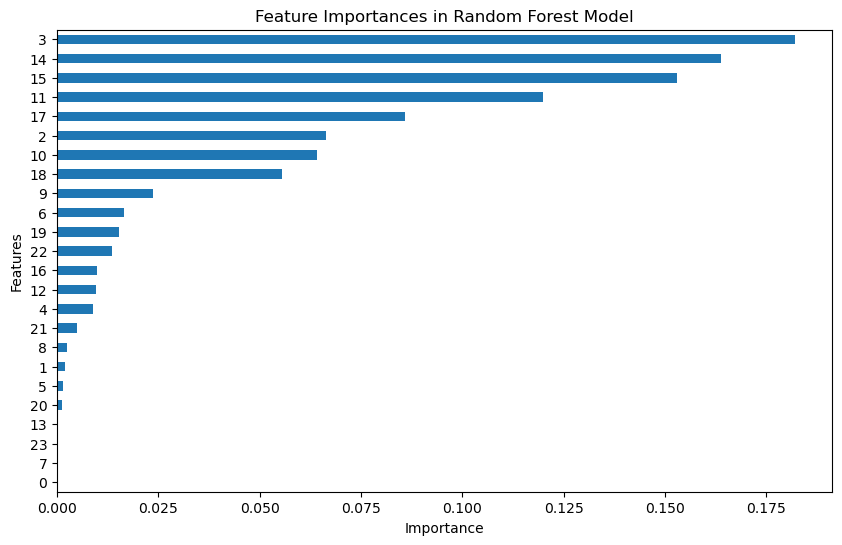

In [127]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(x_train, y_train)

importances = random_forest.feature_importances_
feature_names = x_train.columns

importances_series = pd.Series(importances)
importances_series.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=0) 
random_forest.fit(x_train, y_train)

y_train_pred = random_forest.predict(x_train)
y_test_pred = random_forest.predict(x_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')

accuracy_test = accuracy_score(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

print("Classification Report (Testing Data):")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix (Testing Data):")
print(confusion_matrix(y_test, y_test_pred))

print("Training Data Accuracy:", accuracy_train)
print("Training Data F1 Score:", f1_score_train)
print("Testing Data Accuracy:", accuracy_test)
print("Testing Data F1 Score:", f1_score_test)


Classification Report (Testing Data):
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        13
      notckd       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Confusion Matrix (Testing Data):
[[13  0]
 [ 0 35]]
Training Data Accuracy: 1.0
Training Data F1 Score: 1.0
Testing Data Accuracy: 1.0
Testing Data F1 Score: 1.0


13. There are several challenges that variables can be different scaling, that being said some of the variables might have a greater influence to the model than the other variables. For the KNN, wbcc has the highest impact while in random forest, al has the highest influence on the model.

   Feature  Importance Mean  Importance Std
16    wbcc         0.020833        0.000000
3       al         0.016667        0.008333
17    rbcc         0.016667        0.008333
15     pcv         0.014583        0.009547
14    hemo         0.014583        0.009547
12     sod         0.006250        0.009547
10      bu         0.004167        0.012500
13     pot         0.000000        0.000000
22      pe         0.000000        0.000000
21   appet         0.000000        0.000000
20     cad         0.000000        0.000000
19      dm         0.000000        0.000000
18     htn         0.000000        0.000000
0      age         0.000000        0.000000
1       bp         0.000000        0.000000
11      sc         0.000000        0.000000
9      bgr         0.000000        0.000000
8       ba         0.000000        0.000000
7      pcc         0.000000        0.000000
6       pc         0.000000        0.000000
5      rbc         0.000000        0.000000
4       su         0.000000     

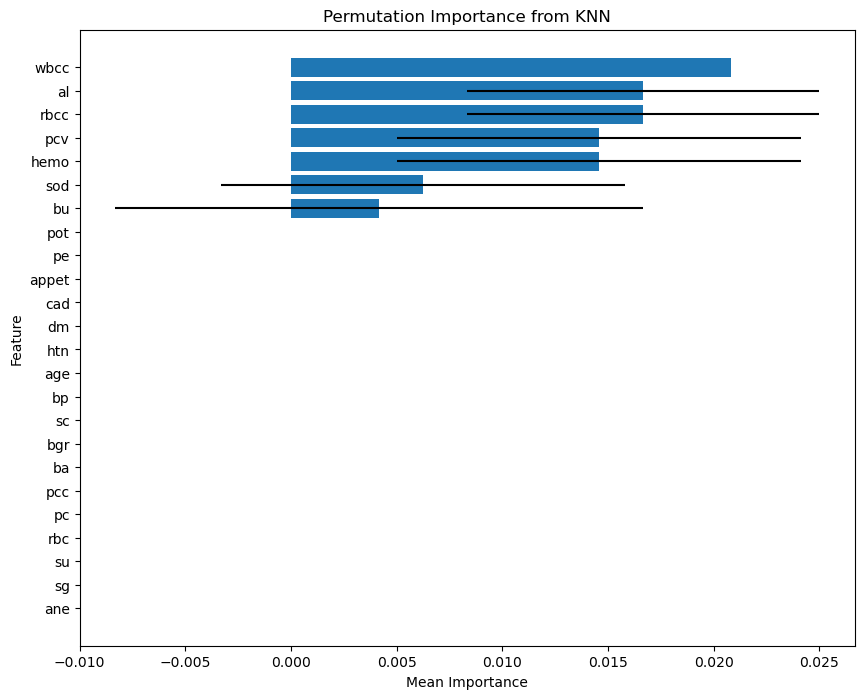

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

results = permutation_importance(knn, x_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)

perm_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance Mean': results.importances_mean,
    'Importance Std': results.importances_std
}).sort_values(by='Importance Mean', ascending=False)

print(perm_importances)

plt.figure(figsize=(10, 8))
plt.barh(perm_importances['Feature'], perm_importances['Importance Mean'], xerr=perm_importances['Importance Std'])
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance from KNN')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()


   Feature  Importance
3       al    0.182096
14    hemo    0.163876
15     pcv    0.153041
11      sc    0.119874
17    rbcc    0.085759
2       sg    0.066358
10      bu    0.064017
18     htn    0.055582
9      bgr    0.023725
6       pc    0.016438
19      dm    0.015350
22      pe    0.013615
16    wbcc    0.009969
12     sod    0.009531
4       su    0.008818
21   appet    0.004872
8       ba    0.002440
1       bp    0.002030
5      rbc    0.001355
20     cad    0.001245
13     pot    0.000007
0      age    0.000000
7      pcc    0.000000
23     ane    0.000000


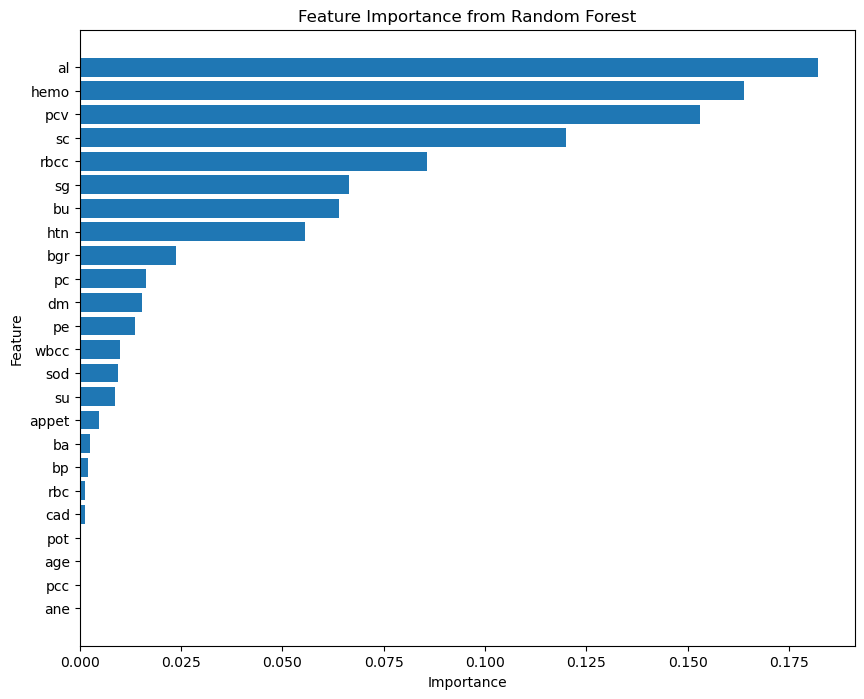

In [135]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(x_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  
plt.show()


15. Yang: Question: 1-5;
Zhuolin: Question: 6-9;
Weimin: Question 10:13

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
